In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})


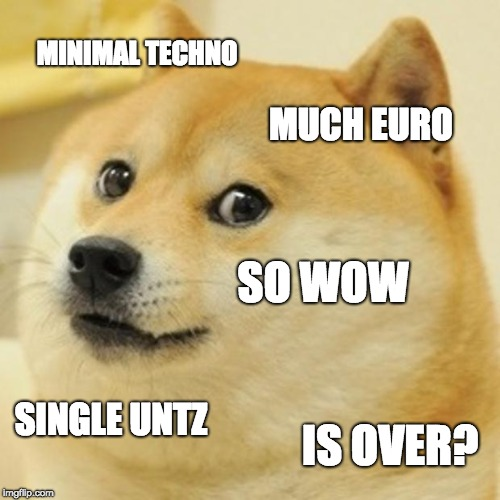

In [2]:
df = pd.read_csv('mintechno2.csv')
df.head()

,album,artist,country,label,year
0,Freak By Night,Cotumo,Germany,Zerinnerung,2006
1,Progress,Alexander Kowalski,Germany,Kanzleramt,2002
2,Cocoon Compilation I,Various,Germany,Cocoon Recordings,2009
3,Welcome To My Club - 1st Issue,Secret Cinema,Netherlands,Gem Records (6),2010
4,Time Axis Manipulation,Mokira,Sweden,Kontra-Musik,2011


In [3]:
df.country.value_counts().head(10).index

Index(['Germany', 'UK', 'US', 'Canada', 'France', 'Italy', 'Netherlands',
       'Belgium', 'Spain', 'Sweden'],
      dtype='object')

# First graph, looking at where the most minimal techno albums have been released

In [6]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.facecolor': '#eeeeee',
    'figure.facecolor': '#f9f9f9',
})

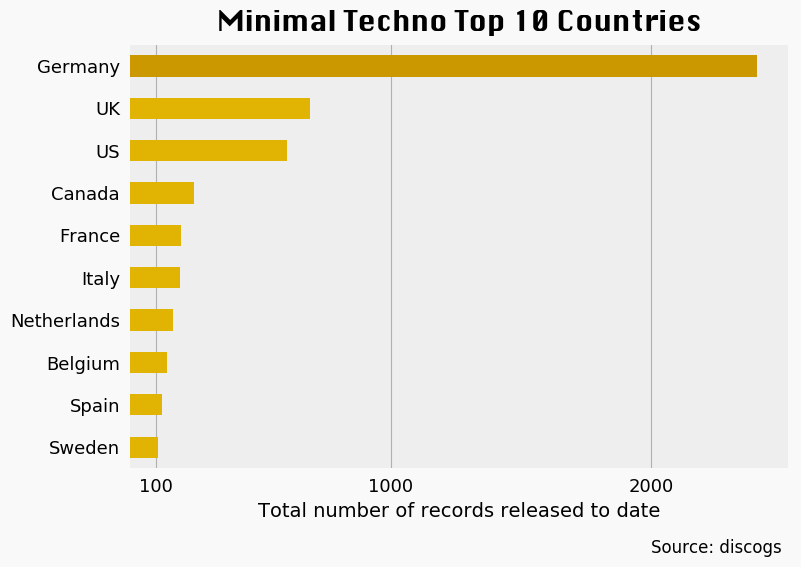

In [43]:
def get_color(country):
    if country == "Germany":
        return '#cb9800'
    else:
        return '#e1b303'

bar_colors = [get_color(name) for name in df.country.value_counts().head(10).sort_values().index]

ax = df.country.value_counts().head(10).sort_values().plot(kind='barh', x='country', figsize=(8.5,5.5), color=bar_colors)
ax.set_title('Minimal Techno Top 10 Countries',pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname("Silom")
ax.set_xticks([100,1000,2000])
ax.set_xlabel('Total number of records released to date', fontsize=14)

ax.tick_params(which='major', left=False, bottom=False, labelsize=13)
ax.grid(True, axis='x')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.text(2000, -2.5, 'Source: discogs', fontsize=12)

#Kewl, let's save that as a pdf.
plt.savefig('top_10_countries.pdf')


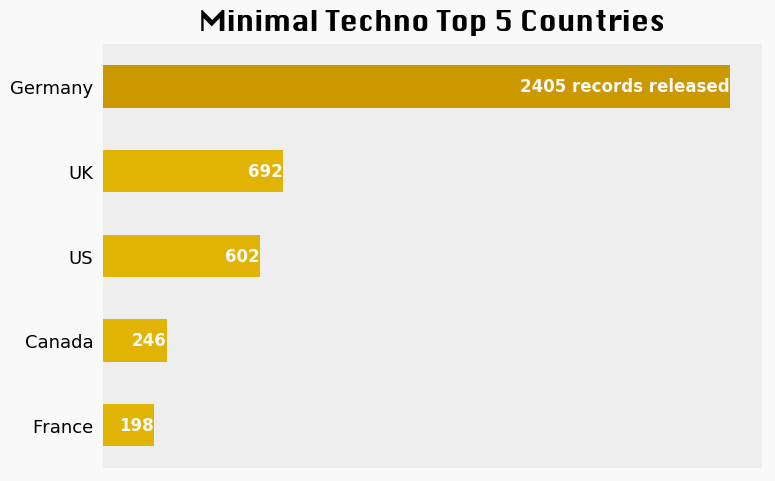

In [44]:
def get_color(country):
    if country == "Germany":
        return '#cb9800'
    else:
        return '#e1b303'

bar_colors = [get_color(name) for name in df.country.value_counts().head(5).sort_values().index]

ax = df.country.value_counts().head(5).sort_values().plot(kind='barh', x='country', figsize=(8.5,5.5), color=bar_colors)
ax.set_title('Minimal Techno Top 5 Countries', pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname("Silom")
ax.set_xticks([])
#ax.set_xlabel('Total number of records released to date', fontsize=14)

ax.tick_params(which='major', left=False, bottom=False, labelsize=13)
ax.grid(False, axis='x')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i, bar in enumerate(ax.patches):
    #print(i)
    if i == 4:
        value = str(bar.get_width()) + ' records released'
    else:
        value = bar.get_width()
    x_pos = (bar.get_width()) - 1
    y_pos = i
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='#f9f9f9', fontweight='bold', fontsize=12)



#ax.text(2000, -2.5, 'Source: discogs', fontsize=12)

#Kewl, let's save that as a pdf.
plt.savefig('top_5_countries.pdf')

# Second graph, looking at total number of records released over time. Is there a trend?

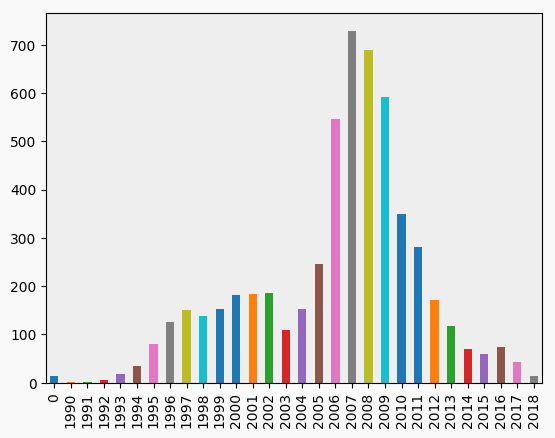

In [36]:
df.year.value_counts().sort_index().plot(kind='bar')

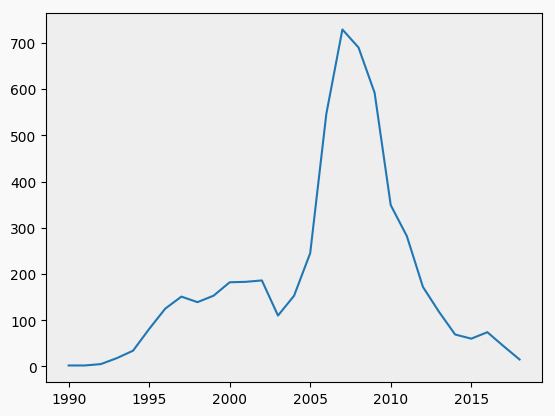

In [37]:
df[df.year != 0].year.value_counts().sort_index().plot() #getting rid of the nulls (stored as 0), allows for line plot.

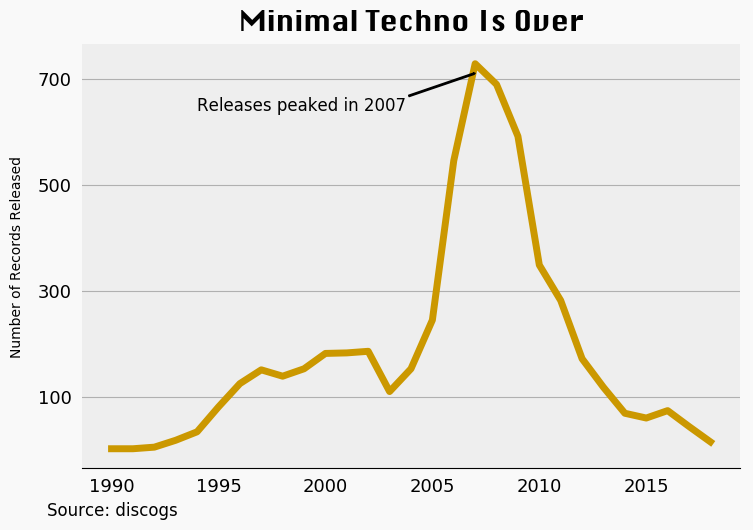

In [45]:
ax = df[df.year != 0].year.value_counts().sort_index().plot(figsize=(8.5,5.5), color='#cb9800', linewidth=5)
ax.set_title('Minimal Techno Is Over',pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname("Silom")

ax.tick_params(which='major', left=False, bottom=False, labelsize=13)
ax.set_yticks([100,300,500,700])

ax.grid(True, axis='y')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#ax.axvline(x=2007, linestyle='dashed', alpha=0.5)

ax.set_ylabel('Number of Records Released', labelpad=10)

ax.annotate('Releases peaked in 2007', fontsize=12, xy=(2007,711), xytext=(1994,640), arrowprops=dict(width=1, headwidth=1, headlength=1))

ax.text(1987, -125, 'Source: discogs', fontsize=12)

#And saving it as a pdf:
plt.savefig('over_time.pdf')

In [39]:
df.dtypes

album      object
artist     object
country    object
label      object
year        int64
dtype: object

In [40]:
df.head()

,album,artist,country,label,year
0,Freak By Night,Cotumo,Germany,Zerinnerung,2006
1,Progress,Alexander Kowalski,Germany,Kanzleramt,2002
2,Cocoon Compilation I,Various,Germany,Cocoon Recordings,2009
3,Welcome To My Club - 1st Issue,Secret Cinema,Netherlands,Gem Records (6),2010
4,Time Axis Manipulation,Mokira,Sweden,Kontra-Musik,2011


In [15]:
df['year'] = df['year'].astype(str)

In [21]:
df = df[df.year !='0']

In [22]:
df['date_year'] = pd.to_datetime(df['year'], format='%Y')

In [23]:
df.dtypes

album                object
artist               object
country              object
label                object
year                 object
date_year    datetime64[ns]
dtype: object

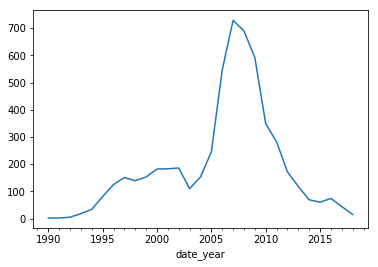

In [28]:
df.resample('A', on='date_year').count().year.plot()

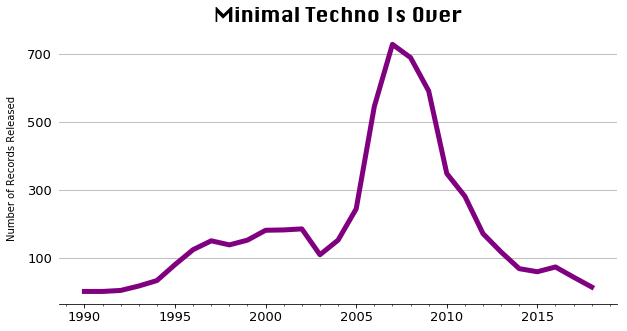

In [67]:
ax = df.resample('A', on='date_year').count().year.plot(figsize=(10,5), color='purple', linewidth=5)
ax.set_title('Minimal Techno Is Over',pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname("Silom")

ax.tick_params(which='both', left=False, bottom=True, labelsize=13)
ax.set_yticks([100,300,500,700])

ax.grid(True, axis='y')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#ax.axvline(x=2007, linestyle='dashed', alpha=0.5)

ax.set_xlabel('Year').set_visible(False)
ax.set_ylabel('Number of Records Released', labelpad=10)

#ax.annotate('Releases peaked in 2007', fontsize=10, xy=(2007,711), xytext=(2000,700), arrowprops=dict(width=1, headwidth=1, headlength=1))

#ax.text(1987, -125, 'Source: discogs', fontsize=12)

#And saving it as a pdf:
plt.savefig('over_time.pdf')

In [94]:
df_wide = df.groupby('year').country.value_counts().unstack().reset_index()

In [48]:
len(df[df.year ==2007])

729

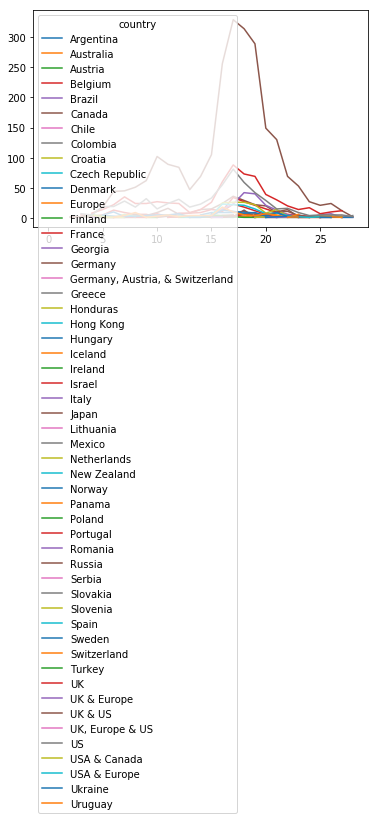

In [98]:
df_wide.plot()

In [108]:
df = df[df.country.notna()]

In [110]:
df.to_csv('mintechno3.csv', index=False)

In [113]:
df = pd.read_csv('mintechno3.csv')

In [114]:
df.country.value_counts()

Germany           2401
UK                 708
US                 608
Canada             248
France             198
Italy              192
Netherlands        163
Belgium            142
Spain              125
Sweden             108
Switzerland         99
Japan               68
Denmark             62
Russia              61
Europe              37
Greece              35
Finland             35
Portugal            25
Australia           25
Argentina           23
Austria             19
Poland              18
Ukraine              9
Hungary              8
Slovenia             8
Ireland              8
Hong Kong            7
Czech Republic       7
Romania              7
Israel               6
Lithuania            5
Brazil               4
Chile                4
Iceland              4
Mexico               4
Norway               3
Serbia               3
New Zealand          3
Uruguay              2
Georgia              2
Slovakia             2
Honduras             1
Colombia             1
Croatia    

In [115]:
df = df[df.country != 'Europe']

In [116]:
df.country.value_counts()

Germany           2401
UK                 708
US                 608
Canada             248
France             198
Italy              192
Netherlands        163
Belgium            142
Spain              125
Sweden             108
Switzerland         99
Japan               68
Denmark             62
Russia              61
Finland             35
Greece              35
Portugal            25
Australia           25
Argentina           23
Austria             19
Poland              18
Ukraine              9
Hungary              8
Slovenia             8
Ireland              8
Hong Kong            7
Czech Republic       7
Romania              7
Israel               6
Lithuania            5
Brazil               4
Chile                4
Iceland              4
Mexico               4
Norway               3
Serbia               3
New Zealand          3
Uruguay              2
Georgia              2
Slovakia             2
Honduras             1
Colombia             1
Croatia              1
Panama     

In [118]:
#Gotta clean up UK and US
df.country = df.country.str.replace('UK','United Kingdom')
df.country = df.country.str.replace('US', 'United States of America')
df.country.value_counts()

Germany                     2401
United Kingdom               708
United States of America     608
Canada                       248
France                       198
Italy                        192
Netherlands                  163
Belgium                      142
Spain                        125
Sweden                       108
Switzerland                   99
Japan                         68
Denmark                       62
Russia                        61
Greece                        35
Finland                       35
Australia                     25
Portugal                      25
Argentina                     23
Austria                       19
Poland                        18
Ukraine                        9
Hungary                        8
Ireland                        8
Slovenia                       8
Hong Kong                      7
Czech Republic                 7
Romania                        7
Israel                         6
Lithuania                      5
Brazil    

In [119]:
df.to_csv("mintechno_cleaned.csv", index=False)

In [2]:
df = pd.read_csv('mintechno_cleaned.csv')

In [61]:
df.groupby('date_year').country.value_counts().unstack().reset_index()

country,date_year,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Croatia,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States of America,Uruguay
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
1,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,1992-01-01,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-01-01,NaN,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
4,1994-01-01,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,NaN
5,1995-01-01,NaN,NaN,3.0,5.0,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,5.0,NaN,NaN,NaN,14.0,19.0,NaN
6,1996-01-01,NaN,1.0,2.0,13.0,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,10.0,1.0,NaN,NaN,23.0,19.0,NaN
7,1997-01-01,NaN,NaN,1.0,9.0,NaN,2.0,NaN,NaN,NaN,...,NaN,1.0,5.0,2.0,4.0,NaN,NaN,35.0,28.0,NaN
8,1998-01-01,NaN,NaN,1.0,6.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,2.0,3.0,9.0,NaN,NaN,25.0,20.0,NaN
9,1999-01-01,NaN,2.0,NaN,6.0,NaN,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,4.0,1.0,1.0,NaN,24.0,32.0,NaN


In [62]:
#Yes! I'll just replace NaN with 0 and we might be good to go!

df_qgis = df.groupby('date_year').country.value_counts().unstack().reset_index()

In [66]:
df_qgis.fillna(0, inplace=True)

In [67]:
df_qgis

country,date_year,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Croatia,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States of America,Uruguay
0,1990-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1991-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1992-01-01,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-01-01,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
4,1994-01-01,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0
5,1995-01-01,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,0.0,0.0,0.0,14.0,19.0,0.0
6,1996-01-01,0.0,1.0,2.0,13.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,10.0,1.0,0.0,0.0,23.0,19.0,0.0
7,1997-01-01,0.0,0.0,1.0,9.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,5.0,2.0,4.0,0.0,0.0,35.0,28.0,0.0
8,1998-01-01,0.0,0.0,1.0,6.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,9.0,0.0,0.0,25.0,20.0,0.0
9,1999-01-01,0.0,2.0,0.0,6.0,0.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,24.0,32.0,0.0


In [68]:
df_qgis.to_csv('mintechno_qgis.csv', index=False)

In [89]:
    df2 = df.groupby('date_year').country.value_counts()

In [96]:
df2.to_csv('test.csv', index=True, header=True)

In [97]:
df_qgis = pd.read_csv('test.csv')

In [98]:
df_qgis

,date_year,country,country.1
0,1990-01-01,Switzerland,1
1,1990-01-01,United States of America,1
2,1991-01-01,United Kingdom,1
3,1992-01-01,Canada,2
4,1992-01-01,Germany,1
5,1992-01-01,Italy,1
6,1992-01-01,Japan,1
7,1993-01-01,United States of America,7
8,1993-01-01,Belgium,5
9,1993-01-01,Canada,2


In [100]:
df_qgis = df_qgis.rename(index=str, columns={"country.1": "count"})

In [101]:
df_qgis.dtypes

date_year    object
country      object
count         int64
dtype: object

In [104]:
df_qgis.date_year = pd.to_datetime(df_qgis['date_year'])

In [105]:
df_qgis.dtypes


date_year    datetime64[ns]
country              object
count                 int64
dtype: object

In [106]:
df_qgis.to_csv('mintechno_qgis.csv', index=False)

In [107]:
df_qgis = pd.read_csv('mintechno_qgis.csv')

In [108]:
df_qgis

,date_year,country,count
0,1990-01-01,Switzerland,1
1,1990-01-01,United States of America,1
2,1991-01-01,United Kingdom,1
3,1992-01-01,Canada,2
4,1992-01-01,Germany,1
5,1992-01-01,Italy,1
6,1992-01-01,Japan,1
7,1993-01-01,United States of America,7
8,1993-01-01,Belgium,5
9,1993-01-01,Canada,2


In [111]:
df_coord = pd.read_csv('country-capitals.csv')

In [114]:
df_coord.CountryName = df_coord.CountryName.str.replace('United States', 'United States of America')

In [116]:
df_coord.dtypes

CountryName          object
CapitalName          object
CapitalLatitude     float64
CapitalLongitude    float64
CountryCode          object
ContinentName        object
dtype: object

In [117]:
result = pd.merge(df_qgis, df_coord, how='inner', left_on='country', right_on='CountryName')

In [118]:
result

,date_year,country,count,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,1990-01-01,Switzerland,1,Switzerland,Bern,46.916667,7.466667,CH,Europe
1,1996-01-01,Switzerland,1,Switzerland,Bern,46.916667,7.466667,CH,Europe
2,1997-01-01,Switzerland,4,Switzerland,Bern,46.916667,7.466667,CH,Europe
3,1998-01-01,Switzerland,9,Switzerland,Bern,46.916667,7.466667,CH,Europe
4,1999-01-01,Switzerland,1,Switzerland,Bern,46.916667,7.466667,CH,Europe
5,2000-01-01,Switzerland,3,Switzerland,Bern,46.916667,7.466667,CH,Europe
6,2001-01-01,Switzerland,5,Switzerland,Bern,46.916667,7.466667,CH,Europe
7,2002-01-01,Switzerland,2,Switzerland,Bern,46.916667,7.466667,CH,Europe
8,2003-01-01,Switzerland,4,Switzerland,Bern,46.916667,7.466667,CH,Europe
9,2004-01-01,Switzerland,4,Switzerland,Bern,46.916667,7.466667,CH,Europe


In [119]:
result.to_csv('mintech_capitals.csv', index=False)